In [ ]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/My Drive/Colab Notebooks/flights_data_processed_cleaned.csv'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path)

In [ ]:
df.columns

Index(['elapsedDays', 'isBasicEconomy', 'isRefundable', 'isNonStop',
       'baseFare', 'seatsRemaining', 'totalTravelDistance',
       'days_until_flight', 'travelhours', 'dephour', 'arrhour', 'DL', 'AA',
       'B6', 'UA', 'F9', 'AS', '4B', 'SY', '9K', '9X', 'KG', 'LF', '3M', 'HA',
       'startingAirport_BOS', 'startingAirport_CLT', 'startingAirport_DEN',
       'startingAirport_DFW', 'startingAirport_DTW', 'startingAirport_EWR',
       'startingAirport_IAD', 'startingAirport_JFK', 'startingAirport_LAX',
       'startingAirport_LGA', 'startingAirport_MIA', 'startingAirport_OAK',
       'startingAirport_ORD', 'startingAirport_PHL', 'startingAirport_SFO',
       'destinationAirport_BOS', 'destinationAirport_CLT',
       'destinationAirport_DEN', 'destinationAirport_DFW',
       'destinationAirport_DTW', 'destinationAirport_EWR',
       'destinationAirport_IAD', 'destinationAirport_JFK',
       'destinationAirport_LAX', 'destinationAirport_LGA',
       'destinationAirport_MIA', 'destin

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
X = df.drop(columns=['baseFare'])
y = df['baseFare']

In [ ]:
X.shape

(3540169, 82)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
X_train.shape

(1062050, 82)

In [ ]:

continuous_features = ['totalTravelDistance', 'elapsedDays', 'days_until_flight', 'travelhours']


scaler = StandardScaler()


X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

In [ ]:
import xgboost as xgb

In [ ]:
X_train.shape

(1062050, 82)

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=30, verbose=3)

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:11:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=30, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 74.22146661029241
Mean Squared Error: 12070.057283093325
Root Mean Squared Error: 109.86381243654948
R² Score: 0.6407721383948198


                      Feature  Importance
1              isBasicEconomy    0.137538
63   strcabin_coachcoachcoach    0.115574
54  strcabin_businessbusiness    0.056514
10                         DL    0.052640
77             strcabin_first    0.046541
78        strcabin_firstfirst    0.046378
61             strcabin_coach    0.045636
72        strcabin_coachfirst    0.045056
5         totalTravelDistance    0.044962
35        startingAirport_OAK    0.029986


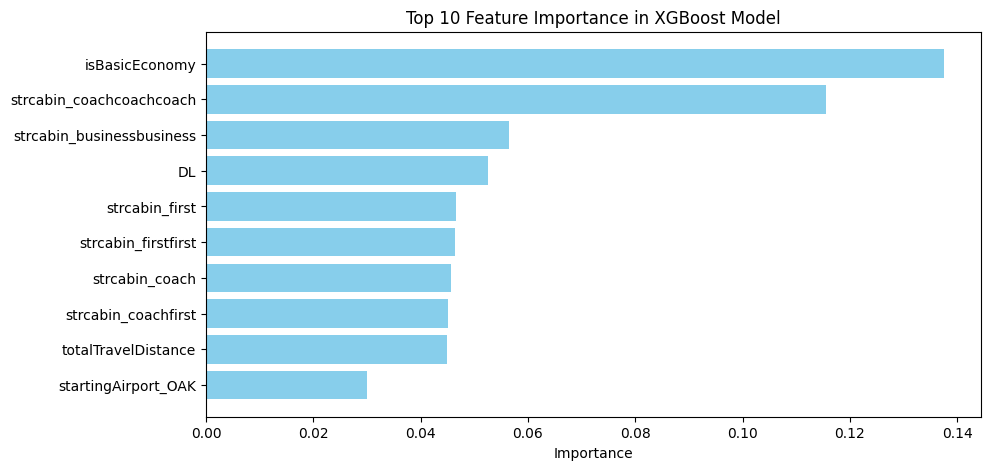

In [ ]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_10_features = feature_importance_df.head(10)

print(top_10_features)

plt.figure(figsize=(10, 5))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()
plt.show()